In [42]:
import numpy        as     np
import matplotlib.pyplot as plt
import scipy.linalg as     linalg
from   scipy.linalg import lu_factor, lu
from   timeit       import repeat
import memray 
import os

# Einsendeaufgabe 1: Numerische Genauigkeit und Gleichungssysteme (100 Punkte)
In dieser Aufgabe sollen Sie ein wenig mehr Erfahrung mit NumPy und numerischen Methoden gewinnen.  
Zur Erinnerung empfehle ich an dieser Stelle, die Definition der [IEEE-Fließkommazahlen](https://de.wikipedia.org/wiki/IEEE_754) zu wiederholen.  

## Addition von Zahlen (20 Punkte) 

Gegeben sei ein Array *array*, dass 100 mal die Zahl $10^{-16}$ enthält und einmal (als ersten Eintrag) die Zahl $1$. 

In [43]:
array = np.concatenate(([1], np.full(100, 1e-16)))
print(array)

[1.e+00 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16
 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16
 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16
 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16
 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16
 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16
 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16
 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16
 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16
 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16 1.e-16
 1.e-16]


**Aufgabe:** Addieren Sie alle Werte in `array`:
- mit der Funktion `np.sum()`
- mit einer Schleife, die von **vorne nach hinten** über `array` iteriert
- mit einer Schleife, die von **hinten nach vorne** über `array` iteriert

_Points:_ 6

<span style="color: brown;" title="Ahmed">
    
## Addition von Zahlen im Array: Unterschiedliche Berechnungsmethoden

In dieser Aufgabe geht es um die Addition von Zahlen, die in einem Array gespeichert sind. Das Array besteht aus 101 Einträgen, wobei der erste Eintrag die Zahl 1 enthält und die restlichen 100 Einträge jeweils den Wert $ 1 \times 10^{-16} $ haben. Die Aufgabe besteht darin, die Summe der Werte in diesem Array auf verschiedene Arten zu berechnen: einmal mit der `np.sum()`-Funktion und zweimal unter Verwendung von Schleifen, die das Array jeweils von vorne nach hinten bzw. von hinten nach vorne durchlaufen.

</span>


In [44]:
sum_forward = 0.0
for x in array:
    sum_forward += x
print(f"Summe mit Schleife: {sum_forward=}")

sum_reverse = 0.0
for x in reversed(array):
    sum_reverse += x
print(f"Summe mit umgekehrter Schleife: {sum_reverse=}")

sum_numpy = np.sum(array)
print(f"Summe mit np.sum: {sum_numpy=}")

Summe mit Schleife: sum_forward=np.float64(1.0)
Summe mit umgekehrter Schleife: sum_reverse=np.float64(1.00000000000001)
Summe mit np.sum: sum_numpy=np.float64(1.0000000000000084)


<!-- BEGIN QUESTION -->

**Aufgabe:** Erklären Sie die Ergebnisse. Wie werden die Zahlen 1 und 1e-17 im Computer dargestellt? (ausführliche Erläuterung erforderlich!)  

_Points:_ 12

<span style="color: brown;" title="Ahmed">
    

## Numerische Genauigkeit von verschiedenen Additionsverfahren

### Unterschiede in der Summierung

Bei der Berechnung der Summe mit unterschiedlichen Verfahren ergeben sich leicht unterschiedliche Ergebnisse:

```python
sum_numpy   = np.float64(1.0000000000000084)
sum_forward = np.float64(1.0)
sum_reverse = np.float64(1.00000000000001)
```
Diese Unterschiede entstehen durch **Rundungsfehler** in der **Gleitkommadarstellung**, die auf der begrenzten Anzahl an Bits basiert, mit der reale Zahlen intern im Computer dargestellt werden.

---

## Gleitkommazahlen im IEEE 754 Standard

Python und NumPy verwenden standardmäßig `float64` (IEEE 754 Double Precision), das wie folgt aufgebaut ist:

- **1 Bit** für das Vorzeichen  
- **11 Bits** für den Exponenten  
- **52 Bits** für die Mantisse  

Insgesamt also **64 Bit**. Die reale Zahl wird durch folgende Formel dargestellt:

```
Zahl = (-1)^s · 1.m · 2^(e - 1023)
```

Dabei ist:

- `s` das Vorzeichenbit  
- `m` die Mantisse (ohne führende 1)  
- `e` der gespeicherte Exponent mit **Bias** = 1023  

---

## Maschinengenauigkeit

Die kleinste Zahl, die zu `1.0` addiert werden kann, sodass sich das Ergebnis **numerisch unterscheidet**, nennt man **Maschinengenauigkeit** oder **machine epsilon** $\varepsilon_{\text{mach}}$:

```python
np.finfo(float).eps
# Ergebnis: 2.220446049250313e-16
```

Zahlen kleiner als `eps` „verpuffen“ bei der Addition zu größeren Zahlen wie `1.0`, da sie außerhalb der darstellbaren Genauigkeit der Mantisse liegen. Wenn zwei Gleitkommazahlen stark unterschiedlich groß sind, kann die kleinere Zahl beim Addieren „verschluckt“ werden – das nennt man Verlust der Signifikanz:

```python
print(1e-16 < np.finfo(float).eps)  # True
print(1.0 + 1e-16 == 1.0)           # True
```

---

## Warum liefert `sum_forward` ein anderes Ergebnis als `sum_reverse`?

Angenommen:

```python
array = np.array([1.0] + [1e-16] * 100)
```

- `sum_forward` addiert zuerst `1.0` und dann viele kleine `1e-16`. Diese einzelnen Summanden sind kleiner als `eps` und **gehen verloren**.
- `sum_reverse` addiert zuerst die kleinen `1e-16` zu einem größeren Zwischenwert (z. B. `1e-14`), der dann zu `1.0` addiert wird und sich **merklich auswirkt**.
- `sum_numpy` verwendet oft optimierte oder paarweise Additionen (`pairwise summation`), was ebenfalls zu einem etwas besseren Ergebnis führen kann.

Gleitkommazahlen sind **nicht assoziativ**, d. h.:

```
(a + b) + c ≠ a + (b + c)
```

Das bedeutet, dass die Reihenfolge der Addition das Ergebnis beeinflussen kann, besonders wenn sehr kleine Zahlen in der Summe enthalten sind.

---

## Darstellung der Zahl `1.0` im IEEE 754-Standard

#### Mathematische Form:

$
1.0 = 1.0 \cdot 2^0 \\
\Rightarrow \text{Echter Exponent} = 0 \\
\Rightarrow \text{Gespeicherter Exponent} = 0 + \text{Bias} = 1023 = 01111111111_2
$

#### Mantisse:
- Die Zahl `1.0` entspricht im Binärsystem: $ 1.000\ldots0_2 $
- Die **führende 1 vor dem Komma** wird im IEEE 754-Format **nicht gespeichert** (implizit angenommen)
- Alle 52 Bits der Mantisse (also der Nachkommastellen) sind daher **0**

#### IEEE 754-Darstellung (64 Bit – `double precision`):

|      s      |   e (11 Bit)   |                    m (52 Bit)                          |
|-------------|----------------|--------------------------------------------------------|
|     `0`     |  `01111111111` | `0000000000000000000000000000000000000000000000000000` |

#### Zusammenfassung:
- **Vorzeichenbit (`s`)**: `0` → Zahl ist positiv  
- **Exponent (`e`)**: 1023 → gespeichert als `01111111111`  
- **Mantisse (`m`)**: nur Nullen (weil keine Nachkommastellen vorhanden sind)  
- Daraus ergibt sich der dargestellte Wert:
  
$
(-1)^0 \cdot 1.0 \cdot 2^{0} = 1.0
$

---

## Darstellung der Zahl `1e-17` im IEEE 754-Standard (Double Precision)

### Mathematische Zerlegung von `1e-17`

### Ziel: Darstellung in der Form

Wir suchen $m$ und $e$, sodass:

$1e-17 = 1.m \cdot 2^{e - 1023}$

### Schritt 1: Umwandlung in Zweierpotenz

Zunächst schreiben wir `1e-17` in etwa als Zweierpotenz:

$1e-17 = 10^{-17} \approx (2^{3.321928094887354...})^{-17}\approx 2^{-3.321928094887354... \cdot 17} \approx 2^{-56.47}$

Das bedeutet:

$1e-17 \in (2^{-57}, 2^{-56})$

### Schritt 2: Rundung auf nächstliegende Zweierpotenz

Da `1e-17` bzw. $2^{-56.47}$ näher an $2^{-57}$ liegt, weil:

$\lvert 2^{-56.47}-2^{-57} \rvert = \lvert  \frac{1}{2^{56.47}} - \frac{1}{2^{57}} \rvert < \lvert  \frac{1}{2^{56.47}} - \frac{1}{2^{56}} \rvert= \lvert 2^{-56.47} - 2^{-56} \rvert$

gilt:

$1e-17 \approx 1.m \cdot 2^{-57}$

### Schritt 3: Exponent berechnen

Der effektive Exponent ist:

$e_{\text{effektiv}} = -57$

Im IEEE 754 Double Precision wird der **Exponent mit Bias 1023** gespeichert:

$e_{\text{gespeichert}} = -57 + 1023 = 966$

In Binär:

$966_{10} = 01111000110_2$

### Schritt 4: Berechnung der Mantisse

Es gilt $1e-17 \approx 1.m \cdot 2^{-57}$ und somit $1.m = \frac{1e-17}{2^{-57}} = 1.4411518807585587...$

Wir nehmen die Nachkommastellen von `1.44115188...` und wandeln sie in Binär um. 

Wir schreiben `1e-17` in binärer Normalform:

$1e-17 = 1.0111000011101111010101000110010001101101010010010110\dots_2 \cdot 2^{-57}$

Die Mantisse sind **die 52 Bits nach dem Komma** (die führende $1.$ wird nicht gespeichert):

### Schritt 5: Zusammensetzung der IEEE-754-Bitfolge

| Feld        | Wert                                                         |
|-------------|--------------------------------------------------------------|
| Vorzeichen  | `0` (da positiv)                                             |
| Exponent    | `01111000110` (`11` Bit für `966`)                           |
| Mantisse    | `0111000011101111010101000110010001101101010010010110`       |


### Gesamter 64-Bit-IEEE-754-Code (Binär)

Die IEEE-754-Bitfolge sieht wie folgt aus (in 64 Bit):
|      s      |   e (11 Bit)   |                    m (52 Bit)                          |
|-------------|----------------|--------------------------------------------------------|
|     `0`     |  `01111000110` | `0111000011101111010101000110010001101101010010010110` |

---
### Fazit:

- Die Zahl `1.0` kann exakt im Format IEE 754 `float64` dargestellt werden.  
- Die Zahl `1e-17` ist **zu klein** und hat eine **unendliche Binärdarstellung**, was zu einer _Rundung_ führen muss. Eine präzise Darstellung innerhalb der 52 Bits der Mantisse ist nicht möglich

</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Aufgabe:** Welches Verfahren verwendet `np.sum()` für die Addition?

_Points:_ 2

<span style="color: brown;" title="Ahmed">

## Kaskadensummation

Paarweise Summation (auch Kaskadensummation genannt) ist ein numerisch besseres Verfahren, bei dem die Werte in mehreren Schritten summiert werden. Dies bedeutet, dass Werte mit ähnlichen Größen zuerst zusammengefasst werden. Dadurch wird der Fehler reduziert, der entstehen kann, wenn immer kleinere Zahlen zu einem sehr großen Wert hinzugefügt werden (wie es bei der sequentiellen Summation der Fall wäre).

### Verfahren von `np.sum()`

NumPy verwendet für die Addition von Arrays ein Verfahren namens **Kaskadensummation** oder **paarweise Summation**. Dieses Verfahren reduziert Rundungsfehler im Vergleich zur sequentiellen Summation und führt in vielen Fällen zu einer höheren Genauigkeit. `np.sum()` kann interne Optimierungen verwenden, wie z. B. parallelisierte Summation, abhängig von der Größe des Arrays und der Hardware. In modernen Implementierungen von NumPy wird oft die `np.add.reduce()` Funktion verwendet, um die Summation durchzuführen, die im Hintergrund mit dem `ufunc`-Mechanismus arbeitet. Diese `reduce`-Methode summiert die Werte sequenziell, aber auch sie optimiert den Prozess, indem sie die Reihenfolge der Summanden variiert oder bei Bedarf parallelisiert.


Mehr Informationen zu dieser Technik gibt es auf [Wikipedia](https://en.wikipedia.org/wiki/Pairwise_summation) und in der [NumPy-Dokumentation](https://numpy.org/doc/stable/reference/generated/numpy.sum.html).

</span>

<!-- END QUESTION -->

## Grenzwerte von Funktionen (20 Punkte)

Geben sei die Funktion $f(x)=\frac{e^x-1}{x}$

Es gilt: $lim_{x \to 0}f(x) = 1$

**Aufgabe:** Schreiben Sie eine Python Funktion `f(x)`, mit deren Hilfe Sie $f(x)$ für $x= 10^{-1}, 10^{-2}, \cdots , 10^{-15}$ mit NumPy berechnen und geben Sie das Ergebnis aus.

**Aufgabe:** Berechnen Sie nun die Funktion für  $x= 10^{-16}, 10^{-17}, \cdots , 10^{-20}$

_Points:_ 8

<span style="color: brown;" title="Ahmed">

<h2>Berechnung der Funktion f(x) = (exp(x) - 1) / x </h2>

In dieser Aufgabe soll die Funktion f(x) für x = 10<sup>-1</sup>, 10<sup>-2</sup>, ..., 10<sup>-15</sup> berechnet werden. Danach soll die Funktion für noch kleinere Werte von x, nämlich x = 10<sup>-16</sup>, 10<sup>-17</sup>, ..., 10<sup>-20</sup>, berechnet werden. 

Der Grenzwert der Funktion für x → 0 ist 1. Dabei sollen mögliche numerische Probleme bei sehr kleinen x beobachtet werden.

</span>

In [45]:
# Definition der Funktion f(x) = (e^x - 1)/x
def f(x):
        return (np.exp(x) - 1) / x


# Bereich 1: x = 10^(-1) bis 10^(-15)
# Erzeuge die Werte x = 10^(-1), 10^(-2), ..., 10^(-15)
input_numbers = np.array([10**(-i) for i in range(1, 16)])
result_limits = f(input_numbers)

#Ausgabe
for x_val, fx in zip(input_numbers, result_limits):
# Die Anwendung von zip gibt einen Iterator zurück, der in der Lage ist Tupel zu erzeugen
    print(f"x = {x_val:.0e}, f(x) = {fx}")

x = 1e-01, f(x) = 1.0517091807564771
x = 1e-02, f(x) = 1.005016708416795
x = 1e-03, f(x) = 1.0005001667083846
x = 1e-04, f(x) = 1.000050001667141
x = 1e-05, f(x) = 1.000005000006965
x = 1e-06, f(x) = 1.0000004999621837
x = 1e-07, f(x) = 1.0000000494336803
x = 1e-08, f(x) = 0.999999993922529
x = 1e-09, f(x) = 1.000000082740371
x = 1e-10, f(x) = 1.000000082740371
x = 1e-11, f(x) = 1.000000082740371
x = 1e-12, f(x) = 1.000088900582341
x = 1e-13, f(x) = 0.9992007221626409
x = 1e-14, f(x) = 0.9992007221626409
x = 1e-15, f(x) = 1.1102230246251565


In [46]:
# Bereich 2: x = 10^(-16) bis 10^(-20)
input_numbers_2 = np.array([10**(-i) for i in range(16, 21)])
result_limits_2 = f(input_numbers_2)

#Ausgabe
for x_val, fx in zip(input_numbers_2, result_limits_2):
# Die Anwendung von zip gibt einen Iterator zurück, der in der Lage ist Tupel zu erzeugen
    print(f"x = {x_val:.0e}, f(x) = {fx}")

x = 1e-16, f(x) = 0.0
x = 1e-17, f(x) = 0.0
x = 1e-18, f(x) = 0.0
x = 1e-19, f(x) = 0.0
x = 1e-20, f(x) = 0.0


<!-- BEGIN QUESTION -->

**Aufgabe:** Was fällt auf? Welche Erklärung haben Sie für das Ergebnis? (Ausführliche Erklärung erforderlich) 

_Points:_ 12

<span style="color: brown;" title="Ahmed">
    
<h2> Erklärung des Verhaltens der Funktion bei kleinen x-Werten </h2>

Für Werte von x zwischen `1e-01` bis `1e-14` liefert die Funktion erwartungsgemäß Ergebnisse nahe bei **1**. Ab etwa 1e-15 treten jedoch drastische Änderungen auf, die durch Rundungsfehler bei der Berechnung von `e^x - 1` bedingt sind. Besonders bei sehr kleinen x-Werten wird der Unterschied zwischen `e^x` und `1` auf dem Computer nicht mehr erkennbar, was zu fehlerhaften Ergebnissen führt. Eine stabilere Berechnung kann durch die Verwendung der Funktion `np.expm1(x)` von NumPy erreicht werden.


Von `1e-01` bis `1e-14` ergibt die Funktion erwartungsgemäß Werte, die sehr nahe bei **1** liegen.  Doch ab etwa `1e-15` ändert sich das Verhalten drastisch:

`x = 1e-15, f(x) = 1.1102230246251565`

`x = 1e-16, f(x) = 0.0`

`x = 1e-17, f(x) = 0.0`  
...

**Bei genauerer Betrachtung** sieht man, dass bereits ab `1e-08` praktisch keine Annäherung mehr an den Soll-Grenzwert stattfindet. Die Berechnung "divergiert numerisch".

| Phänomen                    | Beschreibung                                                                |
|-----------------------------|------------------------------------------------------------------------------|
| Katastrophale [Auslöschung]( https://de.m.wikipedia.org/wiki/Ausl%C3%B6schung_%28numerische_Mathematik%29 )   | Verlust signifikanter Ziffern durch Subtraktion ähnlicher Zahlen             |
| Numerische Instabilität     | Instabiles Verhalten bei kleinen Änderungen der Eingabe                      |
| Rundungsfehlerakkumulation  | Anhäufung von Maschinenfehlern durch viele Rechenoperationen                 |
| (Numerische) Divergenz      | Umgangssprachlich, wenn das Ergebnis sich vom Sollwert entfernt              |

### Ergebnisbeobachtung

Ab etwa $x \approx 10^{-16}$ treten numerische Rundungsfehler sichtbar auf, abhängig von der Maschinengenauigkeit (`float64`).

<h3> Erklärung: Rundungsfehler </h3>

Für sehr kleine `x` gilt näherungsweise:  
`exp(x) ≈ 1 + x`

Wenn `x` so klein wird, dass `e^x` und `1` auf dem Computer **nicht mehr unterscheidbar** sind, wird der Ausdruck `e^x - 1` **numerisch ungenau** (_null_), da beide Terme sehr nah beieinander liegen → Verlust signifikanter Stellen.

> Beispiel:  
> `x = 1e-17` → `exp(x) ≈ 1.00000000000000001`  
> Die Differenz `e^x - 1` ist kleiner als die **Maschinengenauigkeit** `ε` (Epsilon).  
> Deshalb wird `e^x - 1` vom Computer als **0.0** berechnet, da ein 64-Bit-Gleitkommawert (float64) **nicht mehr ausreichend genau** ist.

<h3> Lösung: Stabilere Berechnung mit NumPy </h3>

NumPy bietet mit `np.expm1(x)` eine spezielle Funktion an, die den Ausdruck `exp(x) - 1` **numerisch stabiler** berechnet – insbesondere für sehr kleine `x`.

</span>

<!-- END QUESTION -->

## Gauß-Verfahren und LU-Zerlegung (60 Punkte) 
Obwohl man, wie wir sehen werden, lineare Gleichungssysteme einfach mit SciPy lösen kann, wollen wir in dieser Aufgabe  einmal selbst eine sogenannte LU-Zerlegung bzw. das Gauß-Verfahren implementieren. Außerdem werden wir diesen Code auch später noch verwenden, wenn wir uns mit Performance-Optimierung und Parallelisierung beschäftigen.

Das Gauß-Verfahren ist ein wichtiges Verfahren zum Lösen von linearen Gleichungssystemen, wir gehen hier schrittweise mit der Implementierung vor.

**Aufgabe:** Implementieren Sie die Funktion `b_solve` zur Lösung einer Dreiecksgleichung der Form:

$\left[ {\begin{array}{cccc} 
a_{11} & a_{12} & \cdots & a_{1n}\\ 
0 & a_{22} & \cdots & a_{2n}\\ 
\vdots & \vdots & \ddots & \vdots \\ 
0 & 0 & \cdots & a_{nn}\\ 
\end{array} } \right] \left[{\begin{array}{c}  
x_1\\ 
x_2\\ 
\vdots\\ 
x_n\\ 
\end{array}}\right] =  
\left[{\begin{array}{c}  
b_1\\ 
b_2\\ 
\vdots\\ 
b_n\\ 
\end{array}}\right]$ 

Hier beginnt man mit der Löung der letzten Zeile, denn es gilt:

$x_n = b_n/a_{nn} $
und dann

$x_{n-1} =  (b_{n-1}-a_{(n-1),n}*x_{n})/a_{(n-1),(n-1)}$

$x_{n-2} =  (b_{n-2}-(a_{(n-2),n}*x_{n}+a_{(n-2),(n-1)}*x_{n-1})/a_{(n-2),(n-2)}$


*Hinweis*: Achten Sie darauf, dass ihr Code nicht nur korrekt, sondern auch effizient ist. 

_Points:_ 12

<span style="color:blue">

  <h2>Rückwärtssubstitution</h2>

Im Folgenden wird eine Funktion zur Lösung eines linearen Gleichungssystems mit einer oberen Dreiecksmatrix implementiert. Diese sogenannte Rückwärtssubstitution stellt einen zentralen Schritt im Rahmen des Gauß-Verfahrens dar. Dabei wird die Lösung des Systems zeilenweise von unten nach oben bestimmt. Die Implementierung legt besonderen Wert auf numerische Stabilität und Effizienz. 

</span>

In [47]:
def b_solve(A, b):
    """Löst ein lineares Gleichungssystem Ax = b wobei A eine obere Dreiecksmatrix ist"""

    x = np.zeros_like(b, dtype=np.float64)  # Vektor für die Lösung, initialisiert mit Nullen
    A = A.astype(np.float64)  # Sicherstellen, dass mit floats gerechnet wird
    b = b.astype(np.float64) 
    
    # Rückwärtssubstitution
    for i in range(len(b) - 1, -1, -1):  
        # Berechnung der Summe der Produkte der bekannten x-Werte
        summation = np.dot(A[i, i + 1:], x[i + 1:]) # hier wird die Vektorisierung, die numpy zur Verfügung stellt, benutzt, um die Effizienz zu erhöhen
        x[i] = (b[i] - summation) / A[i, i]  # Berechnung des aktuellen x[i]
    return x

In [48]:
# Test zur Korrektheit der Funktion b_solve

# A als obere Dreiecksmatrix zufällig erschaffen
rng = np.random.default_rng(seed=123)
n = 5
A = rng.random((n, n))
for i in range(n):
    A[i+1:, i] = 0.    
b = rng.random(n) # zufälliger Vektor b
x = b_solve(A, b) # Berechnung von x mit der Funktion b_solve

#Test , np.allclose prüft auf approximale Gleichheit in Gleitpunktzahlen
assert np.allclose(np.dot(A, x), b), "Ergebnisse weichen zu stark ab"
print("Test bestanden. Ax = b, x =", x) 

Test bestanden. Ax = b, x = [ 0.1427651  -1.25919492 -1.89656567 -1.0508303   3.39340802]


**Aufgabe:** Implementieren Sie die LU-Zerlegung einer Matrix mit Pivotisierung.  
Die Funktion `lu_decomposition` soll die Matrizen L und U berechnen.  
Zu Beginn wird der Funktion eine Matrix A übergeben.  


Implementieren Sie die Funktion "in-place", d.h. die Ergebnisse für L und U werden direkt in A geschrieben.  
Dabei wird die ursprüngliche Matrix überschrieben.  
Die Funktion gibt den Pivot-Vektor zurück, der die folgende Form haben sollte:

$ 
P=\left[{\begin{array}{ccc} 
0 & 1& 0\\ 
0 & 0& 1\\ 
1 & 0& 0\\ 
\end{array} } \right] \Rightarrow \left[{\begin{array}{c}  
1\\ 
2\\ 
0\\ 
\end{array}}\right] 
$ 

D.h. es wird nur der Index des Wertes in jeder Zeile gespeichert, der nicht Null ist.

Wenn man dies macht, kann man später für die Lösung einfach den Vektor `bc = b[P]` verwenden, um auch $b$ richtig zu pivotisieren.  

Hinweise: 
- Die Pivot-Zeile lässt sich am einfachsten mit `np.argmax` finden. Die Zeile mit dem höchsten Betrag können Sie mit `np.abs` finden.

- Tauschen zweier Elemente in einem NumPy Array: `v[[a, b]] = v[[b, a]]`

- Versuchen Sie, die interne Vektorisierung von NumPy im Eliminationsschritt zu nutzen. Verwenden Sie dazu die Slicing-Syntax, um die innerste Schleife zu ersetzen.

_Points:_ 15

<span style="color: blue;">
  <h2>LU-Zerlegung mit Pivotisierung</h2>


Im folgenden Code wird die LU-Zerlegung einer Matrix A mit Pivotisierung implementiert. Die Matrix A wird in-place in die Form A = LU zerlegt, wobei U die obere Dreiecksmatrix inklusive der Diagonalen ist. L ist der Teil darunter wobei L eigentlich auf ihrer eigenen Diagonale stets den Wert 1 enthält, was hier jodoch nicht beachtet werden muss. Zusätzlich wird ein Pivot-Vektor zurückgegeben, der die Zeilenvertauschung anzeigt. Die Berechnung erfolgt in-place und nutzt NumPy für effiziente Vektorisierung.
</span>

In [49]:
def lu_decomposition(A):
    """L und U Matrix werden innerhalb von A Matrix berechnet und der Pivot-Vektor wird ausgegeben"""
    
    n = A.shape[0]
    P = np.arange(n)
    for k in range(n):
        
        # Pivotisierung: Index der Zeile mit größtem Betrag in Spalte k finden
        pivot_index = np.argmax(np.abs(A[k:n, k])) + k
        if A[pivot_index, k] == 0:
            raise ValueError("Matrix ist singulär.")
            
        # Zeilen tauschen in A
        if pivot_index != k:
            A[[k, pivot_index], :] = A[[pivot_index, k], :]
            P[[k, pivot_index]] = P[[pivot_index, k]]
        
        A[k+1:n, k] /= A[k, k]    # Berechnung L unterhalb der Diagonale        
        A[k+1:n, k+1:n] -= np.outer(A[k+1:n, k], A[k, k+1:n])    # Berechnung U obere Dreiecksmatrix inklusive Diagonale

    return P #Pivot-Vektor

<!-- BEGIN QUESTION -->

**Aufgabe:** Schreiben Sie eine Funktion `custom_solve`, welche mit Hilfe von `lu_decomposition` ein lineares Gleichungssystem der Form $A*x=b$ löst.  

Hinweis: Versuchen Sie, die interne Vektorisierung von NumPy zu nutzen. Verwenden Sie dazu die Slicing-Syntax, um die innerste Schleife zu ersetzen.

_Points:_ 12

<span style="color: blue;">
  <h2>Lösen mit custom_solve</h2>

Zuerst stellt die Funktion custom_solve sicher, dass Matrix A und Vektor b im float Datentyp vorliegen. Die Berechnungen werden ansonsten scheitern wenn ein Array im Datentyp integer vorliegt. Unter Verwendung der Funktion lu_decomposition wird die LU-Zerlegung von A vorgenommen. Hierbei musste A zur Sicherstellung des Datentyps kopiert werden, wird aber danach wärend der Zerlegung in-place verändert. Diese Veränderungen sind nur innerhalb der Funktion sichtbar. Eine zusätzliche Funktion l_solve dient dazu mittels Vorwärtssubstitution Ly = b[P] zu lösen. Danach kann die bekannte Funktion b_solve verwendet werden um Ux = y zu lösen. Hierbei wird nur der jeweils relevante Teil des veränderten A verwendet wodurch die Funktionen sowohl speicher- als auch recheneffizient arbeiten.

</span>

In [50]:
def l_solve(A, y):
    """Lösen von Ly = b[P] mit Vorwärtssubstitution. L ist untere Dreiecksmatrix mit Einheitsdiagonale"""
    
    # b[P] wird direkt als Parameter y übergeben und inplace berechnet
    n = y.shape[0]   
    # Vorwärtssubstitution
    for i in range(n):        
        y[i] -= np.dot(A[i,:i], y[:i])
    return y

def custom_solve(A, b):
    """Löst ein lineares Gleichungssystem Ax = b mittels LU-Zerlegung und gib Vektor x aus"""   
    
    A = A.astype(np.float64)    # Sicherstellen, dass mit floats gerechnet wird
    b = b.astype(np.float64)
    
    P = lu_decomposition(A)    # Pivot-Vektor und A (welches LU-Zerlegung enthält) werden berechnet   
    y = l_solve(A, b[P])    # Ly = b[P] wird gelöst für y     
    x = b_solve(A, y)    # Ux = y wird gelöst für x    
    return x

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Aufgabe:** Schreiben Sie eine Testfunktion, die überprüft, ob die Lösung ihrer Implementierung des Gauß-Verfahrens richtig ist.  
Testen Sie Gleichungssysteme der Größe $16 \times 16$, $32\times 32$ und $64 \times 64$.

Sie können zum Vergleich die SciPy Funktion `linalg.solve` verwenden:

_Points:_ 6

In [51]:
def test_custom_solve(n):
    """testet Ergebnisse von custom_solve für Matrix A von Dimension n"""
    
    rng = np.random.default_rng(seed=123)
    A = rng.random((n, n))
    b = rng.random(n)
    linalg_x = linalg.solve(A, b)    
    custom_x = custom_solve(A, b)

    #sicherstellen, dass Ergebnisse gleich sind, float-Unpräzision ignorieren
    assert np.allclose(linalg_x, custom_x), f"Ergebnisse weichen zu stark ab bei Dimension {n}"    
    print(f"Test bestanden für Dimension {n} x {n}")



# Vergleicht Ergebnisse von custom_solve mit linalg.solve mittels assert-Bedingung
for n in [16, 32, 64]:
    test_custom_solve(n)

Test bestanden für Dimension 16 x 16
Test bestanden für Dimension 32 x 32
Test bestanden für Dimension 64 x 64


<!-- END QUESTION -->

**Aufgabe:** Wir wollen nun weiter die *fertigen* SciPy Funktionen betrachten. Mit den Funktionen `lu` und `lu_factor` aus dem Packet `scipy.linalg `  können Sie eine LU-Dekomposition durchführen [[1]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu_factor.html#scipy.linalg.lu_factor) und [[2]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html).  
Beide Funktionen haben unter anderem den Parameter `overwrite_a`, der `False` oder `True` sein kann. 

Evaluieren Sie die Performance (Laufzeit) der LU-Zerlegung einer 4096x4096 Matrix, wenn Sie jeweils die Funktionen `lu_factor` und `lu` mit `overwrite_a = True` oder `overwrite_a = False` verwenden.

In der Liste `minimums` sollen die minimalen Laufzeiten in folgender Reihenfolge stehen:
1. `lu_factor` mit `overwrite_a = False`
2. `lu_factor` mit `overwrite_a = True`
3. `lu` mit `overwrite_a = False`
4. `lu` mit `overwrite_a = True`

Hinweis: Da die Matrix A bei der Verwendung von `overwrite_a = True` verändert wird, kann es zu einer Vereinfachung der Berechnung kommen, wenn die Funktion mehrfach nacheinander ausgeführt wird. Aus diesem Grund muss die `timeit` Funktion [repeat](https://docs.python.org/3/library/timeit.html#timeit.repeat) mit `repeat = 2` und `number = 1`  verwendet werden. Die Matrix wird im `setup` Parameter erstellt (aus Zufallswerten mit dem vorgegebenen "random number generator").

_Points:_ 6

<span style="color: blue;">
  <h2>Laufzeitenanalyse mit repeat</h2>

Die Laufzeitenanalyse zeigt, dass lu_factor schneller ist als lu.
Die Verwendung von overwrite_a=True führt zu leicht besseren (niedrigeren) Resultaten.    
Die Erhöhung der repetitions kann die Erbebnisse konstanter machen.
Je nach System können die Laufzeiten variieren.

</span>

In [62]:
n = 4096
number = 1
repetitions = 2


# Liste der verwendeten Funktiosaufrufe
f_list = ["lu_factor(A, overwrite_a=False)", "lu_factor(A, overwrite_a=True)", "lu(A, overwrite_a=False)", "lu(A, overwrite_a=True)"]

# spezialisierte repeat Funktion wird vorbereitet
setup = "rng = np.random.default_rng(seed=123); A = rng.random((n, n))"
repeat_lambda = lambda x: repeat(x, setup, repeat=repetitions, number=number, globals=globals())

minimums = [min(repeat_lambda(x)) for x in f_list]    # alle kürzesten Ausführungszeiten werden in minimums gespeichert            

print(f"{'Funktionsaufruf':<31}  min. Laufzeit") 
for f, m in zip(f_list, minimums):
    print(f"{f:<31}: {m:.6f}")

Funktionsaufruf                  min. Laufzeit
lu_factor(A, overwrite_a=False): 1.047826
lu_factor(A, overwrite_a=True) : 1.050137
lu(A, overwrite_a=False)       : 1.412807
lu(A, overwrite_a=True)        : 1.353652


**Aufgabe:** Untersuchen Sie den Speicherverbrauch der 4 Varianten mit memray.

Um den Einfluss der anderen Berechnungen zu minimieren, empfehlen wir hier, die Berechnungen in eine neue Datei zu schreiben und mit `!` in einer Code-Zelle memray's command-line Interface zu verwenden. 

Am besten tracen Sie nur die LU Funktion mit einem Context Manager!
Verwenden Sie jeweils folgende Dateinamen als `file_name` Parameter in `memray.Tracker`:

- lu_inplace.bin
- lu_notinplace.bin
- lu_factor_inplace.bin
- lu_factor_notinplace.bin

Beantworten Sie bitte die folgenden Fragen:
* Welche Version verwendet am meisten Speicher? 
* Bei welcher Version ist der Speicherverbrauch am konstantesten? 

_Points:_ 9

<span style="color: blue;">
  <h2>Analyse des Speicherverbrauch mit memray</h2>

Im ersten Schritt werden alle ausführbaren .py files erstellt. Hierzu werden die Inhalte nacheinander in eigene files mittels file I/O context manager "with open(...) as ..." geschrieben. Dies wäre auch einzeln mittels line magic %file file_name gefolgt vom Inhalt möglich gewesen, ist so aber effizienter. Damit mit memray gearbeitet werden kann, muss das Paket installiert und importierbar sein. Danach können alle .py files ausgeführt werden. (Auch einzeln möglich mit line magic beginnend mit "!") Memray erstellt dabei die .bin files. Diese enthalten die Infos zum Speicherbedarf. Falls die .bin files schon im Verzeichnis existieren, müssen sie zuvor gelöscht werden mit z.B einem rm Befehl. Alle Speicherallokationen der Funktionen werden in einer Zelle aufgeführt, können aber auch einzeln mit memray command-line Interaktion ausgelesen werden.
</span>

In [54]:
# Liste mit Namen der späteren .bin files
file_names = ["lu_inplace.bin", "lu_notinplace.bin", "lu_factor_inplace.bin", "lu_factor_notinplace.bin"]

# diese Funktion gibt spezifischen Inhalt eines zu erstellenden .py files wieder
text_lambda = lambda file_name:\
f"""
import numpy as np
from scipy.linalg import lu_factor, lu
import memray

n = 8192
rng = np.random.default_rng(seed=123)
A = rng.random((n, n))

with memray.Tracker("{file_name}", native_traces=True, memory_interval_ms=1):
    lu{"_factor" if "_factor" in file_name else ""}(A, overwrite_a={"_inplace" in file_name})
"""

# alle .py files werden erstellt
for bin_name in file_names:
    py_name = bin_name.replace(".bin", ".py")
    with open(py_name, "w") as file:        
        file.write(text_lambda(bin_name))
        print("file erstellt:", py_name)

file erstellt: lu_inplace.py
file erstellt: lu_notinplace.py
file erstellt: lu_factor_inplace.py
file erstellt: lu_factor_notinplace.py


In [55]:
# alle .py files werden ausgeführt in python3 um .bin Dateien zu erstellen
# falls .bin Datei schon existiert, wird sie gelöscht
for bin_name in file_names:
    if os.path.exists(bin_name):
        os.remove(bin_name)    
    os.system(f"python3 {bin_name.replace('.bin', '.py')}")

In [56]:
#Speichernutzung wird aus allen .bin files gelesen und hier zusammengefasst
for file_name in file_names:
    reader = memray.FileReader(file_name)
    mem_use = 0
    largest_allo_size = -1    
    
    for allocation in reader.get_allocation_records():
        mem_use += allocation.size
        if allocation.size > largest_allo_size :
            largest_allo_size = allocation.size
            largest_allo_count = 1
        elif allocation.size == largest_allo_size: # ganze Matrix wird erneut allokiert
            largest_allo_count += 1        
        
    print(f"Speicherallokation von {file_name[:-4]:<20} : {round(mem_use / 2**20)}MB, {round(mem_use / 2**30, 3)}GB, Matrix {largest_allo_count} mal allokiert") 

print()
# Auch die command-line Funktion von memray kann verwendet werden
os.system(f"memray stats {file_name}")

Speicherallokation von lu_inplace           : 1632MB, 1.594GB, Matrix 3 mal allokiert
Speicherallokation von lu_notinplace        : 2144MB, 2.094GB, Matrix 4 mal allokiert
Speicherallokation von lu_factor_inplace    : 608MB, 0.594GB, Matrix 1 mal allokiert
Speicherallokation von lu_factor_notinplace : 608MB, 0.594GB, Matrix 1 mal allokiert

  Computing statistics... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00--:--
📏 Total allocations:
	9

📦 Total memory allocated:
	608.041MB

📊 Histogram of allocation size:
	min: 32.000B
	----------------------------------------
	< 168.000B : 1 ▇▇▇▇▇▇▇▇▇
	< 891.000B : 3 ▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
	< 4.595KB  : 0 
	< 24.251KB : 1 ▇▇▇▇▇▇▇▇▇
	< 128.000KB: 1 ▇▇▇▇▇▇▇▇▇
	< 675.588KB: 0 
	< 3.482MB  : 0 
	< 18.379MB : 0 
	< 97.006MB : 2 ▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
	<=512.000MB: 1 ▇▇▇▇▇▇▇▇▇
	----------------------------------------
	max: 512.000MB

📂 Allocator type distribution:
	 MALLOC: 8
	 MMAP: 1

🥇 Top 5 largest allocating locations (by size):
	- lu_factor

0

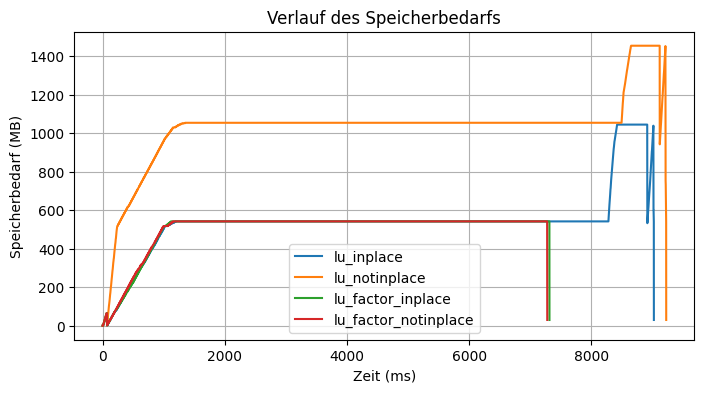

In [57]:
#misst die Veränderung der Speichernutzung während Ausführung der Funktion
#Stellt die Verläufe in einem Graph dar
    
plt.figure(figsize=(8, 4))
for file_name in file_names:
    reader = memray.FileReader(file_name)
    # get_memory_snapshots liefert Snapshots mit timestamp und rss
    # rss mein "resident set size" also die tatsächliche Speichernutzung
    snapshots = list(reader.get_memory_snapshots())
    
    start_ts = snapshots[0].time
    start_rss = snapshots[0].rss
    times = [s.time - start_ts for s in snapshots]
    rss_mb = [(s.rss - start_rss) / (2**20) for s in snapshots]  # in MB    
    plt.plot(times, rss_mb, label=file_name[:-4])    
    
plt.xlabel("Zeit (ms)")
plt.ylabel("Speicherbedarf (MB)")
plt.title(f"Verlauf des Speicherbedarfs")
plt.legend()
plt.grid(True)
plt.show()

<span style="color: blue;">
  <h2>Analyse Speicherverbrauch Ergebnisse</h2>

Die "lu_factor"-Funktionen verbrauchen beide am wenigsten Speicher. Ihr Speicherverbrauch ist während der Laufzeit der Funktion konstant.

Funktionen mit Version "lu" verbrauchen deutlich mehr Speicher besonders "lu_notinplace". Hierbei schwankt der Speicherverbrauch auch wärend der Laufzeit wie man im Graphen erkennen kann. Ein Anstieg vom "Resident Set Size" bzw. Speicherverbrauch entspricht hierbei einer Allokation.  
"lu_factor"-Funktionen allokieren eine Matrix der Dimension (n,n) nur ein mal, "lu"-Funktionen jedoch mehrfach.
</span>

In [ ]:
# command-line Befehl zum Löschen aller erstellten files

#os.system("rm -rf lu_* memray-*")

0